<a href="https://colab.research.google.com/github/katherinekarababas/sodapop-em/blob/master/Pulsar_Likelihoods_with_Different_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone https://github.com/katherinekarababas/sodapop-em.git #download code repository from my GitHub account 

mkdir /opt/bin /opt/lib/ /opt/lib/python3.7 /opt/lib/python3.7/site-packages #create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

cd sodapop-em #install code
# git pull 
python3 setup.py install --prefix /opt/

python3 -m pip install emcee #install emcee package to handle markov-chain monte carlo sampling

echo -e '\n *** \n'

sample-pop-params -h #executable that draws samples in the population model's parameters

echo -e '\n *** \n'

infer-pop-params-em -h #executable that calculates the posterior probability of the sampled population parameters

echo -e '\n *** \n'

build-ppd -h #executable that postprocesses the population posterior samples to calculate the inferred mass distribution

echo -e '\n *** \n'

running install
running bdist_egg
running egg_info
writing sodapop.egg-info/PKG-INFO
writing dependency_links to sodapop.egg-info/dependency_links.txt
writing top-level names to sodapop.egg-info/top_level.txt
writing manifest file 'sodapop.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/populations.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/select.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/parameters.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/emcee.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/__init__.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/diagnostics.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/priors.py -> build/bdist.linux-x86_64/egg/sodapop
byte-compiling

fatal: destination path 'sodapop-em' already exists and is not an empty directory.
mkdir: cannot create directory ‘/opt/bin’: File exists
mkdir: cannot create directory ‘/opt/lib/’: File exists
mkdir: cannot create directory ‘/opt/lib/python3.7’: File exists
mkdir: cannot create directory ‘/opt/lib/python3.7/site-packages’: File exists
zip_safe flag not set; analyzing archive contents...


In [18]:
#function to create likelihoods for pulsars with known mass measurements

import numpy as np

# data from Alsing GitHub Repository
psr_mass = np.array([1.96, 1.71, 1.21, 1.57, 1.53, 1.96, 1.74, 2.0, 2.12, 1.02, 1.57, 1.073, 1.44, 1.91, 1.57, 1.41, 1.559, 1.174, 1.291, 1.322, 1.3332, 1.3452, 1.4398, 1.3886, 1.358, 1.354, 1.3381, 1.2489, 1.312, 1.258, 1.3655, 1.2064, 1.33, 1.40, 1.35, 1.37, 1.72, 1.27, 1.47, 1.908, 2.01, 1.76, 1.393, 1.47, 1.83, 1.44, 1.48, 1.24, 1.34, 1.38, 1.4378, 1.828, 1.29, 2.3, 1.58, 1.71, 1.666, 2.08])
psr_sd = np.array([0.19, 0.21, 0.12, 0.16, 0.42, 0.36, 0.3, 0.4, 0.16, 0.17, 0.11, 0.36, 0.1, 0.45, 0.25, 0.24, 0.004, 0.004, 0.011, 0.011, 0.0010, 0.0010, 0.0002, 0.0002, 0.010, 0.010, 0.0007, 0.0007, 0.017, 0.017, 0.0021, 0.0020, 0.3, 0.21, 0.07, 0.13, 0.07, 0.01, 0.07, 0.016, 0.04, 0.06, 0.013, 0.43, 0.11, 0.07, 0.03, 0.11, 0.08, 0.13, 0.0013, 0.022, 0.1, 0.7, 0.34, 0.16, 0.01, 0.07])
psr_name = ['4U1700-377', 'Cyg_X-2', 'SMC_X-1', 'Cen_X-3', 'XTE_J2123-058', '4U_1822-37', 'OAO_1657-415', 'J013236.7+303228', 'Vela_X-1', '4U1538-522', 'LMC_X-4', 'Her_X-1', '2S_0921-630', 'EXO_1722-363', 'SAXJ1802.7-2017', 'XTEJ1855-026', 'J0453+1559', 'J0453+1559_comp.', 'J1906+0746', 'J190+0746_comp.', 'B1534+12', 'B1534+12_comp.', 'B1913+16', 'B1913+16_comp.', 'B2127+11C', 'B2127+11C_comp.', 'J0737-3039A', 'J0737-3039B', 'J1756-2251', 'J1756-2251_comp.', 'J1807-2500B', 'J1807-2500B_comp.', 'J2045+3633', 'J2053+4650', 'J1713+0747', 'B1855+09', 'J0751+1807', 'J1141-6545', 'J1738+0333', 'J1614-2230', 'J0348+0432', 'J2222-0137', 'J2234+0611', 'J1949+3106', 'J1012+5307', 'J0437+4715', 'J1909-3744', 'J1802-2124', 'J1911-5958A', 'J2043+1711', 'J0337+1715', 'J1946+3417', 'J1918-0642', 'J1600-3053', 'J0045-7319', 'J1023+0038', 'J1903+0327', 'J0740+6602']
# note that this now includes the data from J0740 as there was no major change when it was included vs. not included 

wts = np.ones(100) #need to include this as equal likelihoods for each sample

for i in range(0,58):
  mu, sigma = psr_mass[i], psr_sd[i] # psr mass and sd respectively
  s = np.random.normal(mu, sigma, 100) # likelihood samples 
  np.savetxt('psr_'+psr_name[i]+'.csv', np.column_stack([s,wts]), delimiter=',', header='m,likelihood', comments ='')

In [19]:
# function to create likelihoods for pulsars with known mass function and total mass

# equation 4 from A Population-Informed Mass Estimate for Pulsar J0740+6620 paper
def likelihood_tm(m_total, m_psr, m_func, m_mean, mt_un): 
    return np.exp(-(m_total-m_mean)**2/(2*mt_un**2))*m_total**(4/3)/(3*(m_total-m_psr)**2*m_func**(1/3)*(1-(m_func**(2/3)*m_total**(4/3))/(m_total-m_psr)**2)**(1/2))

# data from Alsing GitHub Repository 
m_func = np.array ([0.136344, 0.001927, 0.14549547, 0.027026849, 0.000646723, 0.0002266235, 0.003658, 0.013066, 0.00945034, 0.006553, 0.246261924525, 0.0518649]) # mass funtion
m_mean = np.array ([2.875, 1.665, 2.453, 2.32, 2.29, 2.92, 2.17, 2.20, 1.62, 1.616, 2.64, 1.97]) # total mass
mt_un = np.array ([0.014, 0.007, 0.014, 0.08, 0.17, 0.20, 0.02, 0.04, 0.07, 0.007, 0.05, 0.15]) # uncertainty for each total mass
psr_mt_name = ['J1913+1102', 'J0024-7204H', 'J0514-4002A', 'J0621+1002', 'B1516+02B', 'J1748-2021B', 'J1748-2446I', 'J1748-2446J', 'B1802-07', 'J1824-2452C', 'B2303+46', 'J1750-37A'] #plusar name

# for loop to generate .csv files of the likelihood for each pulsar
for k in range(0,12):
  mt_samples = []
  psr_samples = []
  tm_like = []
  mt_samp =  np.array (np.random.normal(m_mean[k], mt_un[k], 100)) # likelihood samples for the total mass
  for i in mt_samp:
    psr_samp = np.random.uniform(1., i-m_func[k]**(1/3)*i**(2/3), 1)[0] # likelihood samples for the pulsar mass (upper limit ensures that pulsar mass is not greater than total mass)
    tm_like += [likelihood_tm(i, psr_samp, m_func[k], m_mean[k], mt_un[k])] # probabilities of pulsar masses given the defined values
    psr_samples = np.append(psr_samples, psr_samp)
    mt_samples = np.append(mt_samples, i)
  samples = np.random.choice(range(len(mt_samples)), 100, True, tm_like/np.sum(tm_like)) # likelihood samples 
  # print ('samples =', samples)
  # print ('tm_like =', tm_like)
  wts = np.ones((100,1)) #weight of each pulsar
  total_likes = []
  for index in samples:
    test = [mt_samples[index], psr_samples[index]]
    total_likes = np.append (total_likes, test)
  like_t = np.reshape(total_likes, (100,2)) # this is a 2D array of the total masses and the pulsar masses 
  np.savetxt('psr_mt_'+psr_mt_name[k]+'.csv', np.column_stack([like_t,wts]), delimiter=',', header='tm, m, likelihood', comments ='') # final .csv files

In [20]:
# function to create likelihoods for pulsars with known mass function and mass ratio

# equation 5 from A Population-Informed Mass Estimate for Pulsar J0740+6620 paper
def likelihood_mr(m_ratio, m_psr, m_func, mr_mean, mr_un): 
  return np.exp(-(m_ratio-mr_mean)**2/(2*mr_un**2)*(1+m_ratio)**(4/3)/(3*m_func**(1/3)*m_psr**(2/3)*m_ratio**2*(1-(m_func/m_psr)**(2/3)*(1/m_ratio)**(4/3)/m_ratio**2)))

# data from Alsing GitHub Repository
mr_func = np.array ([5e-6, 3e-7, 0.002644, 0.0017607, 0.005221]) # mass function
mr_mean = np.array ([69.2, 175, 5.85, 9.54, 3.45]) # mass ratio (q)
mr_un = np.array ([0.8, 3, 0.13, 0.21, 0.02]) # uncertainties for the mass ratios
psr_mr_name = ['B1957+20', 'J1311-3430', 'J1740-5350', 'J1816+4510', 'J1723-2837'] # pulsar name

# for loop to generate .csv files for the likelihood of each pulsar
for k in range(0,5):
  mr_samples = []
  psr_samples = []
  rm_like = []
  mr_samp = np.random.normal (mr_mean[k], mr_un[k], 100) # likelihood samples for the mass ratio
  for i in mr_samp:
    psr_samp = np.random.uniform (1., 3., 1)[0] # likelihhod samples for the pulsar mass 
    rm_like += [likelihood_mr(i, psr_samp, mr_func[k], mr_mean[k], mr_un[k])] # probabilities of the pulsar mass given each defined value
    psr_samples = np.append(psr_samples, psr_samp)
    mr_samples = np.append (mr_samples, i)
  samples = np.random.choice(range(len(mr_samples)), 100, True, rm_like/np.sum(rm_like)) # likelihood samples
  wts = np.ones ((100,1)) # weight of each pulsar 
  total_likes = []
  for index in samples:
    test = [mr_samples[index], psr_samples[index]]
    total_likes = np.append (total_likes, test) 
  likes_q = np.reshape (total_likes, (100,2)) # this is a 2D array of the mass ratios and the pulsar masses
  np.savetxt ('psr_mr_'+psr_mr_name[k]+'.csv', np.column_stack([likes_q,wts]), delimiter=',', header='q, m, likelihood', comments='') # final .csv files

In [21]:
#population inference

# observations
PATH = './' 
g_likelihood = ','.join(['psr_'+psr_name[i]+'.csv' for i in range(0,58)]) # gaussian pulsars
mt_likelihood = ','.join(['psr_mt_'+psr_mt_name[i]+'.csv' for i in range(0,12)]) # total mass pulsars
mr_likelihood = ','.join(['psr_mr_'+psr_mr_name[i]+'.csv' for i in range(0,5)])
likelihood = g_likelihood + ',' + mt_likelihood + ',' + mr_likelihood # list of all types of likelihoods

dat_type = 'psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr,psr'  
likelihood_num = 100 

# population model using the power law in masses where the convention is m1 >= m2
# testing with the uniform model
pop_mod = 'unif_mass' # individual mass model to plot the likelihoods
cb_mod = 'unif_m1_peakcut_m2_qpair' # this doesn't matter anymore; it has no effect on the data we just kept it to not mess with the population parameters and inference cells 
pop_param = 'mmin,mmax+flat12,1.,1.5,1.5,3.' 
mcmc_start = 'mmin,mmax+flat12,1.,1.2,1.8,2.4'

# selection effect (we don't know for pulsar data so we don't use this)
chirp_mass = 'False' #defult to no selection effect 
samp_num = 1000 #number of samples to use for monte carlo calculation of detection fraction

# mcmc algorithm
walks = 10 #number of walkers for mcmc
post_samp = 1000 #only start saving posterior samples after this number of steps
post_num = 10000 #number of posterior samples to aim for; added more so there are more dots on the corner plot

# postprocessing
pop_num = 1000 #how many population models to average when computing inferred mass distribution

In [22]:
# draw population parameter samples from model

%%bash -s "$pop_mod" "$walks" "$mcmc_start"
# this cell is a separate terminal instance; with the -s option we are passing the variables we defined above into the terminal as $1,$2,...

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

sample-pop-params $1 -n $2 -p $3 -o ${1}_prior.csv -v # call the executable that draws the starting samples for the mcmc algorithm
# sample-pop-params [population model] -n [number of mcmc walkers] -p [distribution to draw population parameters from] -o [path where population samples should be output]

In [23]:
# do the population inference based on the pulsar data

%%bash -s "$likelihood" "$pop_mod" "$PATH" "$cb_mod" "$dat_type" "$likelihood_num" "$pop_param" "$chirp_mass" "$samp_num" "$post_num" "$walks" "$post_samp"

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

IFS=',' read -r -a likes <<< "$1" # some bash magic to turn the lists into arrays
IFS=',' read -r -a classes <<< "$5" 

# echo "$2"
infer-pop-params-em ${2}_prior.csv $(for like in "${likes[@]}"; do echo -n "${3}/${like} "; done) -p $2 -C ${classes[@]} -c m -l $6 -P $7 -B 3. 60. 0. -f $8 -s $9 -t ${10} -w ${11} -b ${12} -o ${2}.csv --diag -v # call the executable that runs the mcmc algorithm
# infer-pop-params [prior samples] [likelihood1 likelihood2 ...] -p [bns_pop_model nsbh_pop_model] -C [psr  ...] -c [likelihood column names] -l [number of likelihood samples] -P [prior distribution] -B [fixed black hole population parameters] -f [selection function] -s [number of selection samples] -t [number of posterior samples] -w [number of walkers] -b [number of burn-in samples] -o [path where posterior samples should be output]

walkers: 10, burn in: 1000, target posterior samples: 10000, likelihood samples: 100, selection effect samples: 1000
Loading likelihood data...
.//psr_4U1700-377.csv
.//psr_Cyg_X-2.csv
.//psr_SMC_X-1.csv
.//psr_Cen_X-3.csv
.//psr_XTE_J2123-058.csv
.//psr_4U_1822-37.csv
.//psr_OAO_1657-415.csv
.//psr_J013236.7+303228.csv
.//psr_Vela_X-1.csv
.//psr_4U1538-522.csv
.//psr_LMC_X-4.csv
.//psr_Her_X-1.csv
.//psr_2S_0921-630.csv
.//psr_EXO_1722-363.csv
.//psr_SAXJ1802.7-2017.csv
.//psr_XTEJ1855-026.csv
.//psr_J0453+1559.csv
.//psr_J0453+1559_comp..csv
.//psr_J1906+0746.csv
.//psr_J190+0746_comp..csv
.//psr_B1534+12.csv
.//psr_B1534+12_comp..csv
.//psr_B1913+16.csv
.//psr_B1913+16_comp..csv
.//psr_B2127+11C.csv
.//psr_B2127+11C_comp..csv
.//psr_J0737-3039A.csv
.//psr_J0737-3039B.csv
.//psr_J1756-2251.csv
.//psr_J1756-2251_comp..csv
.//psr_J1807-2500B.csv
.//psr_J1807-2500B_comp..csv
.//psr_J2045+3633.csv
.//psr_J2053+4650.csv
.//psr_J1713+0747.csv
.//psr_B1855+09.csv
.//psr_J0751+1807.csv
.//ps

/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:34: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:15: RuntimeWarning: divide by zero encountered in log


In [24]:
# calculate the inferred mass distribution from the population posterior samples

%%bash -s "$pop_mod" "$samp_num" "$chirp_mass" "$pop_num"

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

build-ppd-em ${1}.csv -p $1 -s $2 -f $3 -m $4 -o ${1}_ppd.csv -v # call the executable that draws the starting samples for the mcmc algorithm
# build-ppd [posterior samples] -p [population model] -s [number of selection effect samples] -f [selection function] -m [number of population models to average] -o [path where inferred mass distribution should be output]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


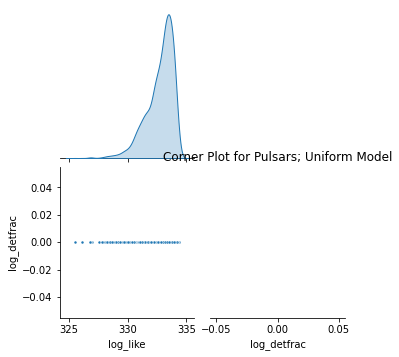

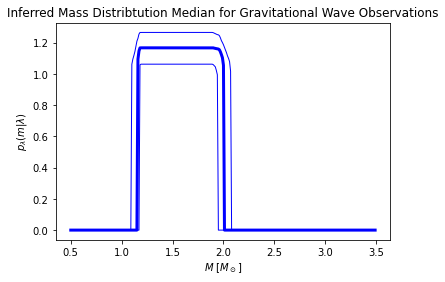

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#corner plot

post_dat = np.genfromtxt(pop_mod+'.csv',delimiter=',',names=True,dtype=None)

params = post_dat.dtype.names[2:4] 
post = np.column_stack([post_dat[param] for param in params]) 
post_frame = pd.DataFrame(post,columns=params)

fig = sns.pairplot(post_frame, kind='scatter', markers='.', diag_kind='kde', corner=True, diag_kws=dict(lw=1,common_norm=False))
fig.map_lower(sns.kdeplot, levels=[0.1,0.5]) 

plt.title ('Corner Plot for Pulsars; Uniform Model')
plt.show()

ppd_data = np.genfromtxt(pop_mod+'_ppd.csv',delimiter=',',names=True,dtype=None) 

colours = plt.rcParams['axes.prop_cycle'].by_key()['color'] # pyplot magic to get default colours

plt.plot(ppd_data['m'],ppd_data['med'],lw=3, color='b') # inferred mass distribution median 
plt.plot(ppd_data['m'],ppd_data['ub'],lw=1, color='b') #upper error bound
plt.plot(ppd_data['m'],ppd_data['lb'],lw=1, color='b') #lower error bound

plt.title ('Inferred Mass Distribtution Median for Gravitational Wave Observations')
plt.xlabel(r'$M$ [$M_\odot$]')
plt.ylabel(r'$p_\lambda(m|\lambda)$')
plt.show()

In [26]:
# testing with the double gaussian mass distribtuion model (high and low end cutoffs)
pop_mod = 'bimodcut_mass'
pop_param = 'mmin,mmax+flat12,1.,1.5,1.5,3. mu1+flat,1.,3. sigma1+flat,-0.5,2. mu2+flat,1.,3. sigma2+flat,-0.5,2. w+flat,0.,1.'
mcmc_start = 'mmin,mmax+flat12,1.,1.2,1.8,2.4 mu1+flat,1.,1.5 sigma1+flat,0.2,0.7 mu2+flat,1.,1.5 sigma2+flat,0.2,0.7 w+flat,0.,1.'
walks = 15
post_num = 50000

In [27]:
# draw population parameter samples from model

%%bash -s "$pop_mod" "$walks" "$mcmc_start"
# this cell is a separate terminal instance; with the -s option we are passing the variables we defined above into the terminal as $1,$2,...

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

sample-pop-params $1 -n $2 -p $3 -o ${1}_prior.csv -v # call the executable that draws the starting samples for the mcmc algorithm
# sample-pop-params [population model] -n [number of mcmc walkers] -p [distribution to draw population parameters from] -o [path where population samples should be output]

In [28]:
# do the population inference based on the pulsar data

%%bash -s "$likelihood" "$pop_mod" "$PATH" "$cb_mod" "$dat_type" "$likelihood_num" "$pop_param" "$chirp_mass" "$samp_num" "$post_num" "$walks" "$post_samp"

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

IFS=',' read -r -a likes <<< "$1" # some bash magic to turn the lists into arrays
IFS=',' read -r -a classes <<< "$5" 

# echo "$2"
infer-pop-params-em ${2}_prior.csv $(for like in "${likes[@]}"; do echo -n "${3}/${like} "; done) -p $2 -C ${classes[@]} -c m -l $6 -P $7 -B 3. 60. 0. -f $8 -s $9 -t ${10} -w ${11} -b ${12} -o ${2}.csv --diag -v # call the executable that runs the mcmc algorithm
# infer-pop-params [prior samples] [likelihood1 likelihood2 ...] -p [bns_pop_model nsbh_pop_model] -C [psr  ...] -c [likelihood column names] -l [number of likelihood samples] -P [prior distribution] -B [fixed black hole population parameters] -f [selection function] -s [number of selection samples] -t [number of posterior samples] -w [number of walkers] -b [number of burn-in samples] -o [path where posterior samples should be output]

walkers: 15, burn in: 1000, target posterior samples: 50000, likelihood samples: 100, selection effect samples: 1000
Loading likelihood data...
.//psr_4U1700-377.csv
.//psr_Cyg_X-2.csv
.//psr_SMC_X-1.csv
.//psr_Cen_X-3.csv
.//psr_XTE_J2123-058.csv
.//psr_4U_1822-37.csv
.//psr_OAO_1657-415.csv
.//psr_J013236.7+303228.csv
.//psr_Vela_X-1.csv
.//psr_4U1538-522.csv
.//psr_LMC_X-4.csv
.//psr_Her_X-1.csv
.//psr_2S_0921-630.csv
.//psr_EXO_1722-363.csv
.//psr_SAXJ1802.7-2017.csv
.//psr_XTEJ1855-026.csv
.//psr_J0453+1559.csv
.//psr_J0453+1559_comp..csv
.//psr_J1906+0746.csv
.//psr_J190+0746_comp..csv
.//psr_B1534+12.csv
.//psr_B1534+12_comp..csv
.//psr_B1913+16.csv
.//psr_B1913+16_comp..csv
.//psr_B2127+11C.csv
.//psr_B2127+11C_comp..csv
.//psr_J0737-3039A.csv
.//psr_J0737-3039B.csv
.//psr_J1756-2251.csv
.//psr_J1756-2251_comp..csv
.//psr_J1807-2500B.csv
.//psr_J1807-2500B_comp..csv
.//psr_J2045+3633.csv
.//psr_J2053+4650.csv
.//psr_J1713+0747.csv
.//psr_B1855+09.csv
.//psr_J0751+1807.csv
.//ps

/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:34: RuntimeWarning: divide by zero encountered in log
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:15: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/populations.py:111: RuntimeWarning: divide by zero encountered in true_divide
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/populations.py:111: RuntimeWarning: invalid value encountered in true_divide
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:34: RuntimeWarning: invalid value encountered in log
The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1020;
tau: [1929.44724

In [29]:
# calculate the inferred mass distribution from the population posterior samples

%%bash -s "$pop_mod" "$samp_num" "$chirp_mass" "$pop_num"

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

build-ppd-em ${1}.csv -p $1 -s $2 -f $3 -m $4 -o ${1}_ppd.csv -v # call the executable that draws the starting samples for the mcmc algorithm
# build-ppd [posterior samples] -p [population model] -s [number of selection effect samples] -f [selection function] -m [number of population models to average] -o [path where inferred mass distribution should be output]

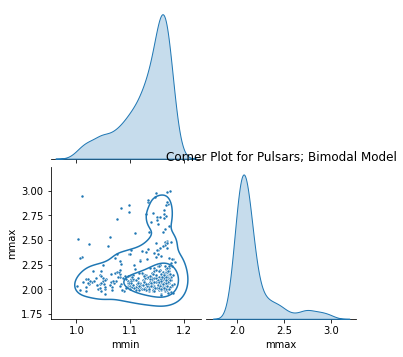

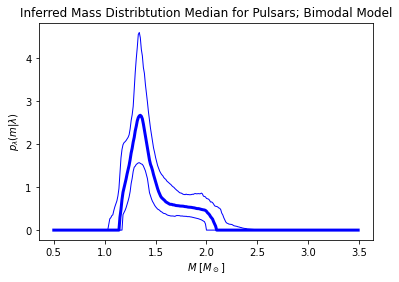

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#corner plot

post_dat = np.genfromtxt(pop_mod+'.csv',delimiter=',',names=True,dtype=None)

params = post_dat.dtype.names[5:7] 
post = np.column_stack([post_dat[param] for param in params]) 
post_frame = pd.DataFrame(post,columns=params)

fig = sns.pairplot(post_frame, kind='scatter', markers='.', diag_kind='kde', corner=True, diag_kws=dict(lw=1,common_norm=False))
fig.map_lower(sns.kdeplot, levels=[0.1,0.5]) 

plt.title ('Corner Plot for Pulsars; Bimodal Model')
plt.show()

ppd_data = np.genfromtxt(pop_mod+'_ppd.csv',delimiter=',',names=True,dtype=None) 

colours = plt.rcParams['axes.prop_cycle'].by_key()['color'] # pyplot magic to get default colours

plt.plot(ppd_data['m'],ppd_data['med'],lw=3, color='b') # inferred mass distribution median 
plt.plot(ppd_data['m'],ppd_data['ub'],lw=1, color='b') #upper error bound
plt.plot(ppd_data['m'],ppd_data['lb'],lw=1, color='b') #lower error bound

plt.title ('Inferred Mass Distribtution Median for Pulsars; Bimodal Model')
plt.xlabel(r'$M$ [$M_\odot$]')
plt.ylabel(r'$p_\lambda(m|\lambda)$')
plt.show()

In [ ]:
# hopefully faster to run changed in packages
%%bash

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

cd sodapop-em #install code
git pull 
python3 setup.py install --prefix /opt/

Updating bfa53d7..3c1e7f1
Fast-forward
 sodapop/populations.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
running install
running bdist_egg
running egg_info
writing sodapop.egg-info/PKG-INFO
writing dependency_links to sodapop.egg-info/dependency_links.txt
writing top-level names to sodapop.egg-info/top_level.txt
writing manifest file 'sodapop.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying sodapop/populations.py -> build/lib/sodapop
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/diagnostics.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/priors.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/__init__.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/select.py -> build/bdist.linux-x86_64/egg/sodapop
copying build/lib/sodapop/emcee.py -> build/bdist.linux-x86_64/egg/sodapop
copyin

From https://github.com/katherinekarababas/sodapop-em
   bfa53d7..3c1e7f1  master     -> origin/master
zip_safe flag not set; analyzing archive contents...


In [ ]:
# testing with the power model
pop_mod = 'power_mass'
pop_param = 'mmin,mmax+flat12,1.,1.5,1.5,3. alpha+flat,-10.,1.'
mcmc_start = 'mmin,mmax+flat12,1.,1.2,1.8,2.4 alpha+flat,-0.1,0.1'
walks = 10
post_num = 10000

In [ ]:
# draw population parameter samples from model

%%bash -s "$pop_mod" "$walks" "$mcmc_start"
# this cell is a separate terminal instance; with the -s option we are passing the variables we defined above into the terminal as $1,$2,...

export PATH=$PATH:/opt/bin # the code doesn't need to be reinstalled in each terminal, but we do need to point to the install directory like this each time
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

sample-pop-params $1 -n $2 -p $3 -o ${1}_prior.csv -v # call the executable that draws the starting samples for the mcmc algorithm
# sample-pop-params [population model] -n [number of mcmc walkers] -p [distribution to draw population parameters from] -o [path where population samples should be output]

In [ ]:
# do the population inference based on the pulsar data

%%bash -s "$likelihood" "$pop_mod" "$PATH" "$cb_mod" "$dat_type" "$likelihood_num" "$pop_param" "$chirp_mass" "$samp_num" "$post_num" "$walks" "$post_samp"

export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python3.7/site-packages

IFS=',' read -r -a likes <<< "$1" # some bash magic to turn the lists into arrays
IFS=',' read -r -a classes <<< "$5" 

# echo "$2"
infer-pop-params-em ${2}_prior.csv $(for like in "${likes[@]}"; do echo -n "${3}/${like} "; done) -p $2 -C ${classes[@]} -c m -l $6 -P $7 -B 3. 60. 0. -f $8 -s $9 -t ${10} -w ${11} -b ${12} -o ${2}.csv --diag -v # call the executable that runs the mcmc algorithm
# infer-pop-params [prior samples] [likelihood1 likelihood2 ...] -p [bns_pop_model nsbh_pop_model] -C [psr  ...] -c [likelihood column names] -l [number of likelihood samples] -P [prior distribution] -B [fixed black hole population parameters] -f [selection function] -s [number of selection samples] -t [number of posterior samples] -w [number of walkers] -b [number of burn-in samples] -o [path where posterior samples should be output]

walkers: 10, burn in: 1000, target posterior samples: 10000, likelihood samples: 100, selection effect samples: 1000
Loading likelihood data...
.//psr_4U1700-377.csv
.//psr_Cyg_X-2.csv
.//psr_SMC_X-1.csv
.//psr_Cen_X-3.csv
.//psr_XTE_J2123-058.csv
.//psr_4U_1822-37.csv
.//psr_OAO_1657-415.csv
.//psr_J013236.7+303228.csv
.//psr_Vela_X-1.csv
.//psr_4U1538-522.csv
.//psr_LMC_X-4.csv
.//psr_Her_X-1.csv
.//psr_2S_0921-630.csv
.//psr_EXO_1722-363.csv
.//psr_SAXJ1802.7-2017.csv
.//psr_XTEJ1855-026.csv
.//psr_J0453+1559.csv
.//psr_J0453+1559_comp..csv
.//psr_J1906+0746.csv
.//psr_J190+0746_comp..csv
.//psr_B1534+12.csv
.//psr_B1534+12_comp..csv
.//psr_B1913+16.csv
.//psr_B1913+16_comp..csv
.//psr_B2127+11C.csv
.//psr_B2127+11C_comp..csv
.//psr_J0737-3039A.csv
.//psr_J0737-3039B.csv
.//psr_J1756-2251.csv
.//psr_J1756-2251_comp..csv
.//psr_J1807-2500B.csv
.//psr_J1807-2500B_comp..csv
.//psr_J2045+3633.csv
.//psr_J2053+4650.csv
.//psr_J1713+0747.csv
.//psr_B1855+09.csv
.//psr_J0751+1807.csv
.//ps

/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/populations.py:29: RuntimeWarning: invalid value encountered in power
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:34: RuntimeWarning: divide by zero encountered in log
/opt/lib/python3.7/site-packages/sodapop-0.0-py3.7.egg/sodapop/emcee.py:15: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
